In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model

from tensorflow.keras.callbacks import TensorBoard


# Dynamic Pressure

In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [3]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
Normal_DPx=Normal_DP.drop(columns=['Time '])
Normal_DPx

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [5]:
#Normalizing the data
for col in Normal_DPx:
    Normal_DPx[col] = (Normal_DPx[col]-Normal_DPx[col].min())/(Normal_DPx[col].max()-Normal_DPx[col].min())

In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
Cavitation_DPx=Cavitation_DP.drop(columns=['Time '])
Cavitation_DPx

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_DPx:
    Cavitation_DPx[col] = (Cavitation_DPx[col]-Cavitation_DPx[col].min())/(Cavitation_DPx[col].max()-Cavitation_DPx[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_DPx)
Normal_DPx = scaler.transform(Normal_DPx)

scaler.fit(Cavitation_DPx)
Cavitation_DPx = scaler.transform(Cavitation_DPx)


In [10]:
Normal_DPx = pd.DataFrame(Normal_DPx, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure', 'H'])
Cavitation_DPx = pd.DataFrame(Cavitation_DPx, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure', 'H'])


In [11]:
Normal_DPx['Time ']=Normal_DP['Time ']
Normal_DPx

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,5.931638,0.809176,-1.136223,-0.561535,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.641717,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.617028,5.906167,0.000195
3,5.931638,0.809176,-1.136223,-1.032546,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.543018,5.906167,0.000391
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558,89.843555


In [12]:
Cavitation_DPx['Time ']=Cavitation_DP['Time ']
Cavitation_DPx

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805


In [13]:
Normal_DP=Normal_DPx
Cavitation_DP=Cavitation_DPx

In [14]:
df=Normal_DP
Cavdf=Cavitation_DP


In [15]:
df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,5.931638,0.809176,-1.136223,-0.561535,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.641717,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.617028,5.906167,0.000195
3,5.931638,0.809176,-1.136223,-1.032546,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.543018,5.906167,0.000391
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558,89.843555


In [16]:
Cavdf

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805


In [17]:
X_train=df

In [18]:
X_train=X_train.drop(columns=['Time '])

In [19]:
X_train

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,5.931638,0.809176,-1.136223,-0.561535,5.906167
1,5.931638,0.809176,-1.136223,-0.641717,5.906167
2,5.931638,0.809176,-1.136223,-0.617028,5.906167
3,5.931638,0.809176,-1.136223,-1.032546,5.906167
4,5.931638,0.809176,-1.136223,-0.543018,5.906167
...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558


In [20]:
X_train=np.array(X_train)


In [21]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [22]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 5, 1)

In [23]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.LSTM(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(5, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(5, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(5, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(5, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [24]:
X_test=Cavdf

In [25]:
X_test=X_test.drop(columns=['Time '])

In [26]:
X_test.shape

(1048576, 5)

In [27]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 54s 27ms/step - loss: 0.4331 - val_loss: 0.5003
Epoch 2/150
1797/1797 [==============================] - 48s 27ms/step - loss: 0.2813 - val_loss: 0.4118
Epoch 3/150
1797/1797 [==============================] - 48s 27ms/step - loss: 0.2309 - val_loss: 0.4034
Epoch 4/150
1797/1797 [==============================] - 46s 26ms/step - loss: 0.2008 - val_loss: 0.3826
Epoch 5/150
1797/1797 [==============================] - 47s 26ms/step - loss: 0.1732 - val_loss: 0.3457
Epoch 6/150
1797/1797 [==============================] - 46s 26ms/step - loss: 0.1453 - val_loss: 0.3265
Epoch 7/150
1797/1797 [==============================] - 47s 26ms/step - loss: 0.1230 - val_loss: 0.3077
Epoch 8/150
1797/1797 [==============================] - 47s 26ms/step - loss: 0.1112 - val_loss: 0.2939
Epoch 9/150
1797/1797 [==============================] - 48s 26ms/step - loss: 0.1019 - val_loss: 0.2839
Epoch 10/150
1797/1797 [==============================]

In [28]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 81s 3ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

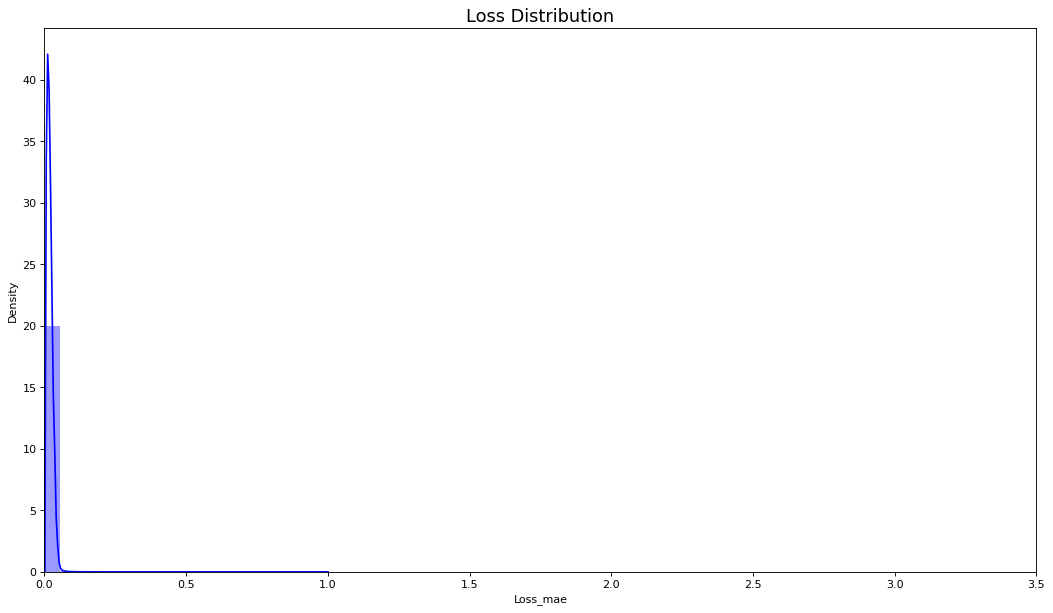

In [29]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [30]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 104s 3ms/step


In [31]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 5, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

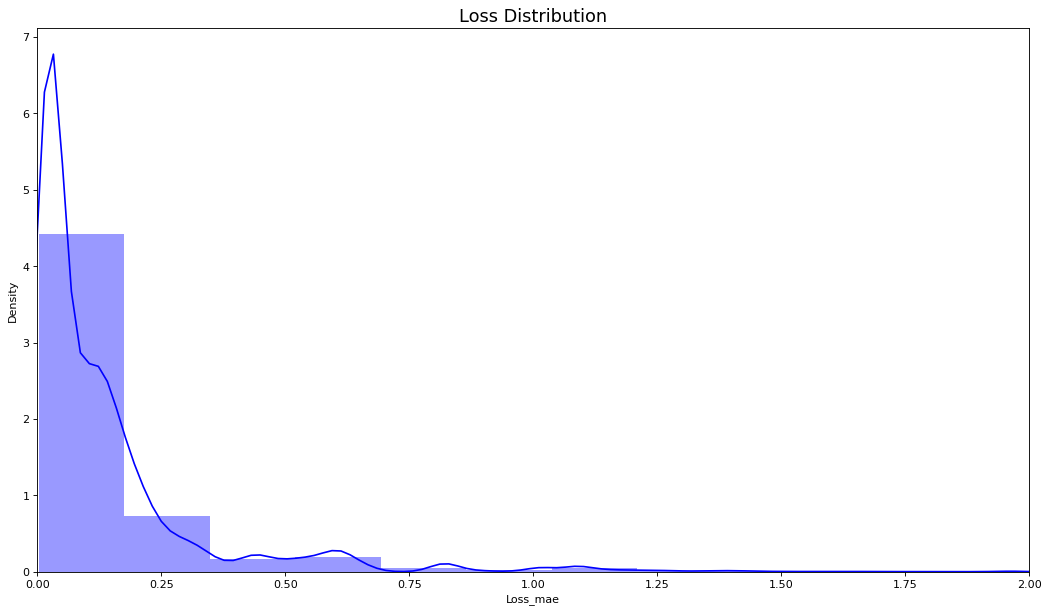

In [32]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.75)

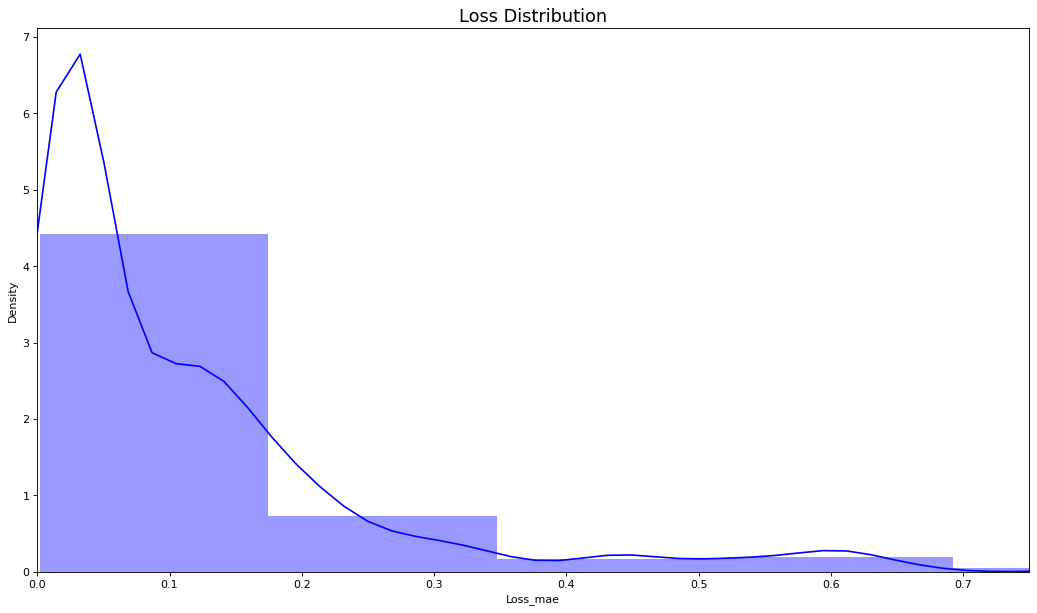

In [33]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.,0.75])

In [34]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.7

In [35]:
test_mae_loss.shape

(1048576, 1)

In [36]:
test_score_df = Cavdf
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


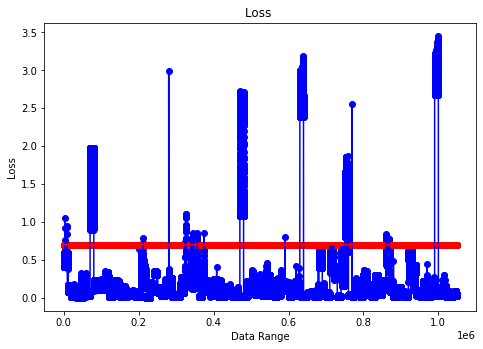

In [37]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [38]:
test_score_df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000,0.567484,0.7,False
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098,0.438763,0.7,False
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195,0.428123,0.7,False
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293,0.530893,0.7,False
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391,0.458207,0.7,False
...,...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512,0.030427,0.7,False
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609,0.035309,0.7,False
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707,0.033334,0.7,False
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805,0.030240,0.7,False


In [39]:
test_score_df["anomaly"][1]

False

In [40]:
anomalies=test_score_df


In [41]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
3871,1.465952,1.664881,1.177414,3.794890,1.380058,0.378027,1.048648,0.7,True
3874,1.465952,1.664881,1.177414,3.437838,1.380058,0.378320,0.761502,0.7,True
3876,1.465952,1.664881,1.177414,3.611088,1.380058,0.378516,0.917611,0.7,True
9266,1.465952,1.664881,1.177414,-3.726618,1.380058,0.904883,0.929716,0.7,True
9289,1.465952,1.664881,1.177414,-3.668868,1.380058,0.907129,0.837088,0.7,True
...,...,...,...,...,...,...,...,...,...
999995,-4.945634,-1.169536,0.439230,-0.095819,-4.897004,97.655762,2.770769,0.7,True
999996,-4.945634,-1.169536,0.439230,0.547380,-4.897004,97.655859,2.714239,0.7,True
999997,-4.945634,-1.169536,0.439230,-0.250711,-4.897004,97.655957,2.801748,0.7,True
999998,-4.945634,-1.169536,0.439230,0.261233,-4.897004,97.656055,2.699360,0.7,True


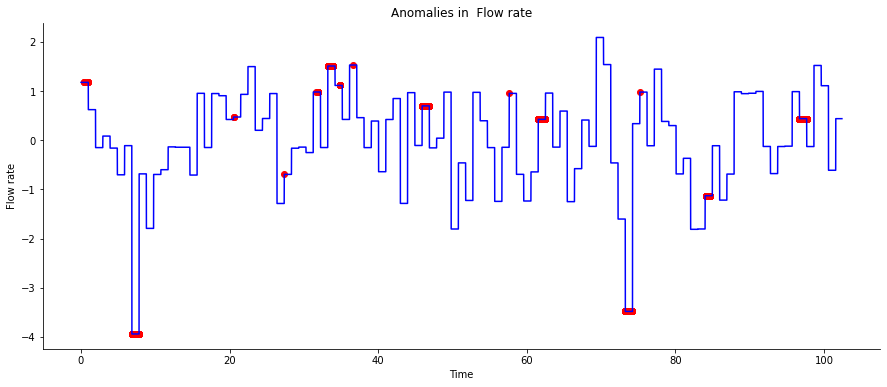

In [42]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

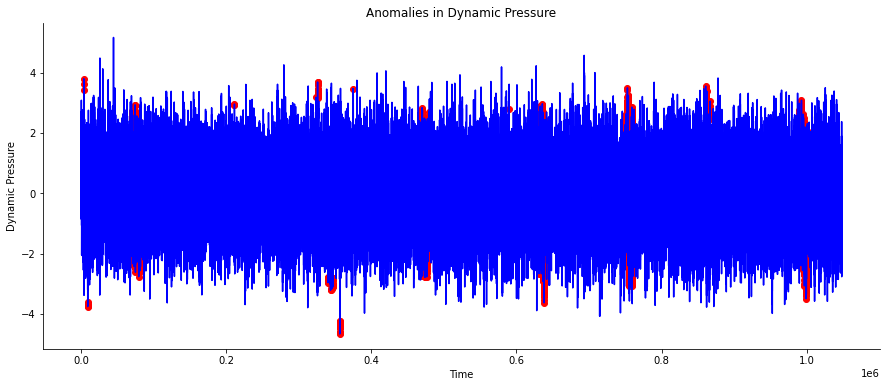

In [43]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Dynamic Pressure'], color='blue')
ax.scatter(anomalies.index, anomalies['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

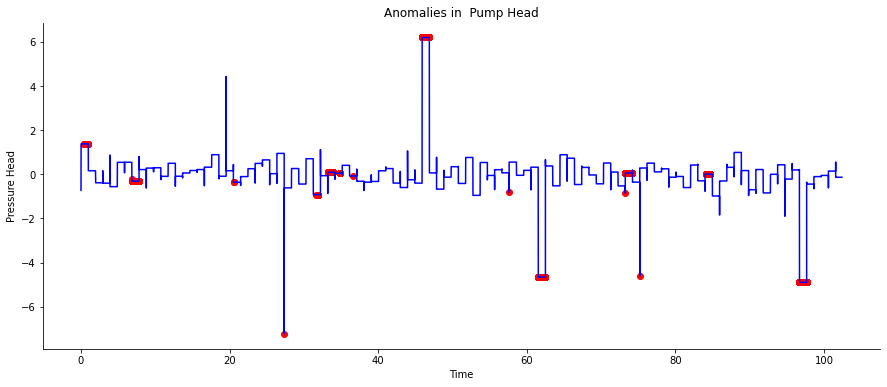

In [69]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")

plt.show()

In [44]:
model.save("LSTM02_DP")


INFO:tensorflow:Assets written to: LSTM02_DP\assets


# Vibration

In [45]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")

In [46]:
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [47]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [48]:
Normal_Vibx

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [49]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [50]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [51]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [52]:
Cavitation_Vibx

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [53]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [54]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [55]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [56]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [57]:
df['Time ']=Normal_Vibx['Time ']
df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167,0.000195
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167,0.000391
...,...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558,89.843555


In [58]:
Cavdf['Time ']=Cavitation_Vibx['Time ']
Cavdf

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391
...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805


In [59]:
X_train=df

In [60]:
X_train=X_train.drop(columns=['Time '])

In [61]:
X_train=np.array(X_train)


In [62]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [63]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 6, 1)

In [64]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.LSTM(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(6, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(6, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(6, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(6, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [65]:
X_test=Cavdf

In [66]:
X_test=X_test.drop(columns=['Time '])

In [67]:
X_test.shape

(1048576, 6)

In [70]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 75s 42ms/step - loss: 0.3505 - val_loss: 0.4319
Epoch 2/150
1797/1797 [==============================] - 70s 39ms/step - loss: 0.2440 - val_loss: 0.3590
Epoch 3/150
1797/1797 [==============================] - 72s 40ms/step - loss: 0.1785 - val_loss: 0.2942
Epoch 4/150
1797/1797 [==============================] - 76s 42ms/step - loss: 0.1182 - val_loss: 0.3027
Epoch 5/150
1797/1797 [==============================] - 70s 39ms/step - loss: 0.1023 - val_loss: 0.2523
Epoch 6/150
1797/1797 [==============================] - 70s 39ms/step - loss: 0.0936 - val_loss: 0.2261
Epoch 7/150
1797/1797 [==============================] - 70s 39ms/step - loss: 0.0872 - val_loss: 0.2283
Epoch 8/150
1797/1797 [==============================] - 70s 39ms/step - loss: 0.0822 - val_loss: 0.2170
Epoch 9/150
1797/1797 [==============================] - 70s 39ms/step - loss: 0.0789 - val_loss: 0.1981
Epoch 10/150
1797/1797 [==============================]

In [71]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 123s 4ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

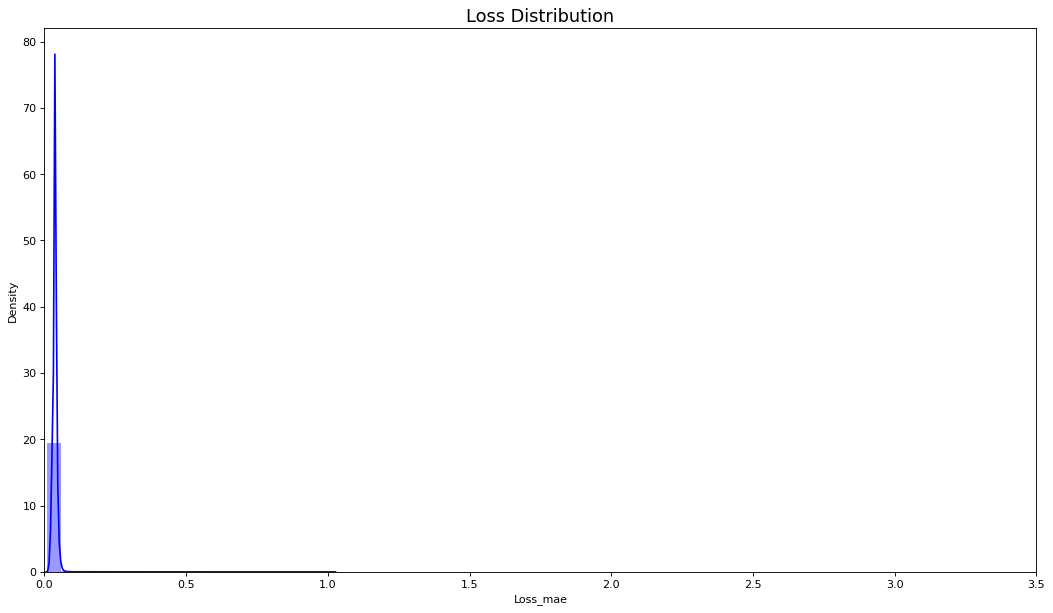

In [72]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [73]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 151s 5ms/step


In [74]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 6, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 5.0)

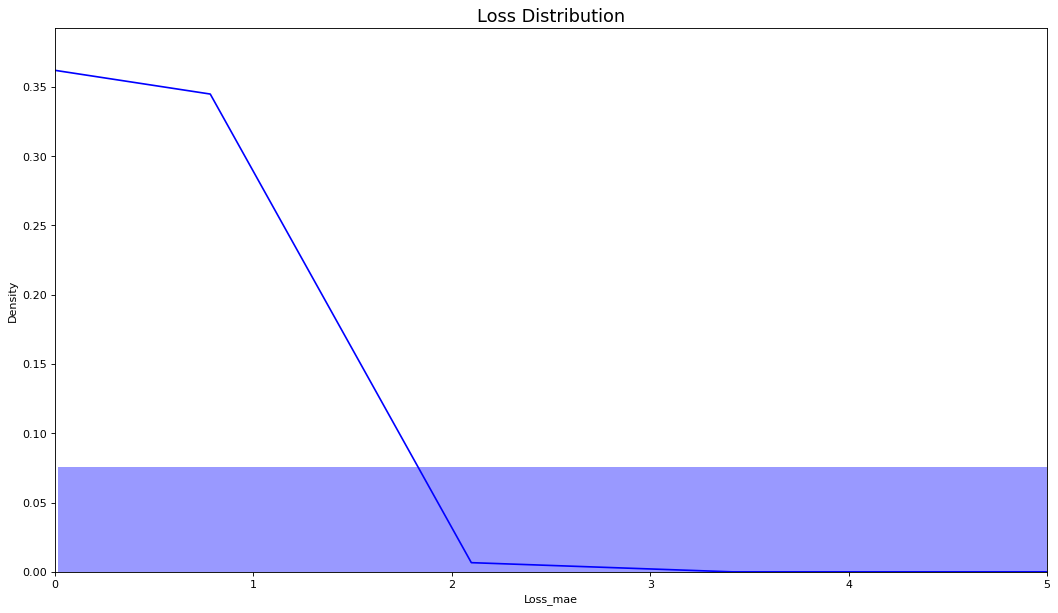

In [76]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,5.0])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(2.0, 4.0)

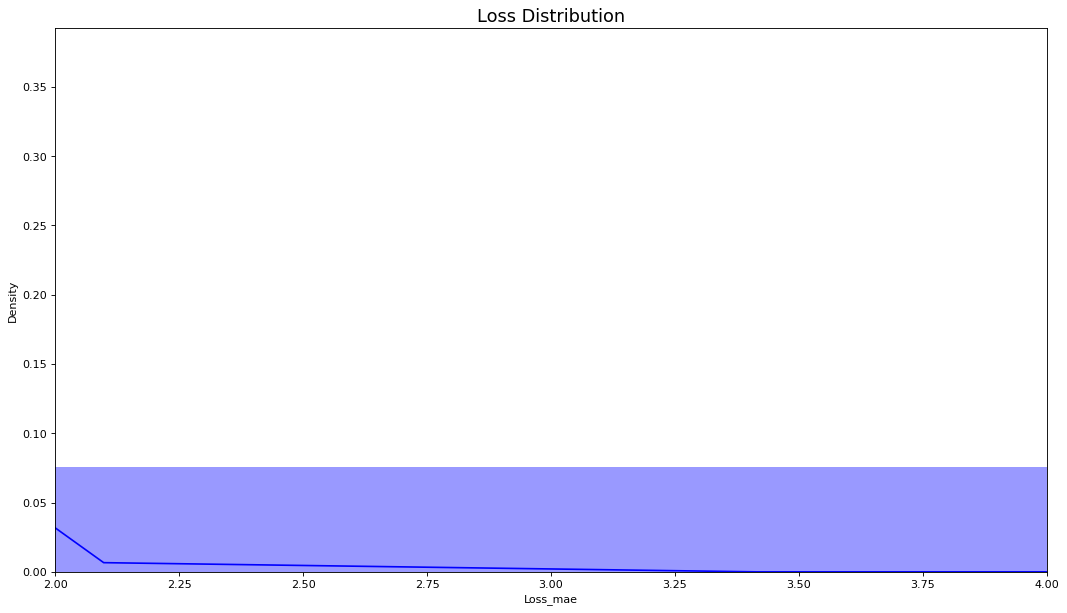

In [77]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([2.0,4.0])

In [78]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=3.75

In [79]:
test_score_df = Cavdf
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


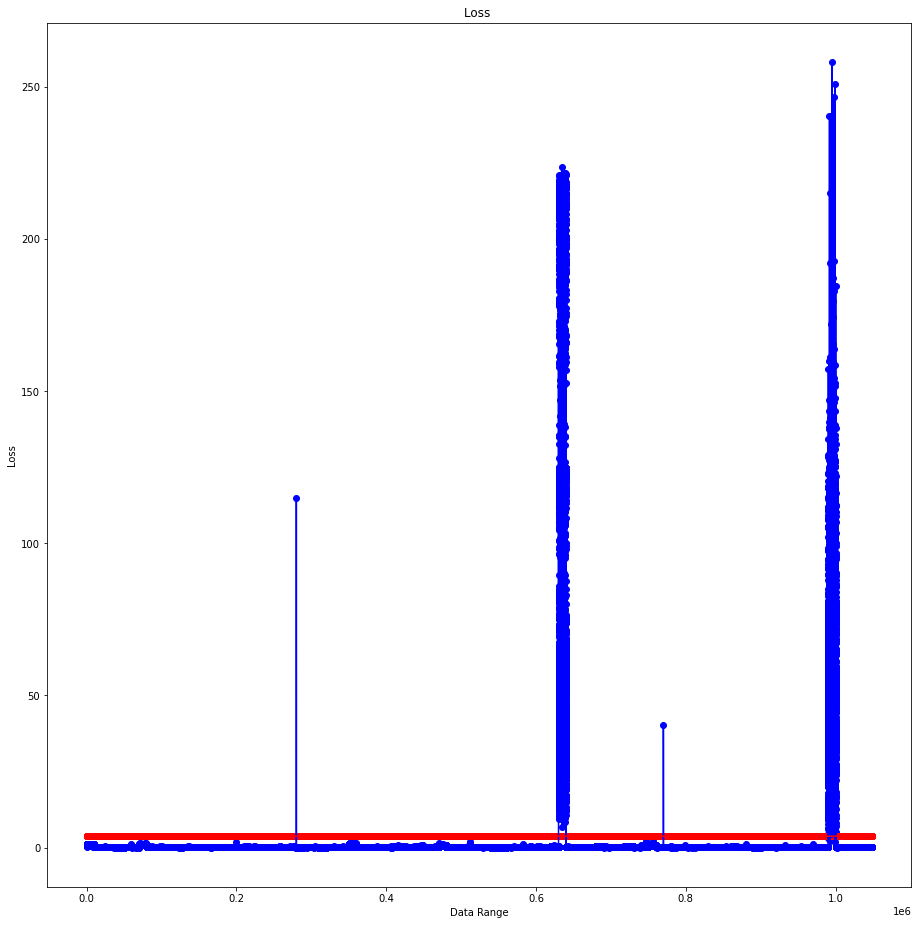

In [80]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [81]:
test_score_df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000,0.237288,3.75,False
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098,0.749917,3.75,False
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195,0.762642,3.75,False
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293,0.744813,3.75,False
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391,0.710597,3.75,False
...,...,...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512,0.041250,3.75,False
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609,0.041053,3.75,False
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707,0.041098,3.75,False
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805,0.042349,3.75,False


In [82]:
test_score_df["anomaly"][1]

False

In [83]:
anomalies=test_score_df


In [84]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
280000,-7.149614,1.198694,-0.694215,-1.815502,0.096406,-7.235990,27.343750,114.874511,3.75,True
630001,-4.657612,-0.261460,0.424993,-1.342675,0.720862,-4.657361,61.523535,15.510154,3.75,True
630002,-4.657612,-0.261460,0.424993,-0.094260,1.576423,-4.657361,61.523633,58.883129,3.75,True
630003,-4.657612,-0.261460,0.424993,-0.389550,0.694323,-4.657361,61.523730,40.495561,3.75,True
630004,-4.657612,-0.261460,0.424993,1.717441,0.092531,-4.657361,61.523828,121.994509,3.75,True
...,...,...,...,...,...,...,...,...,...,...
999995,-4.945634,-1.169536,0.439230,-1.258038,1.267361,-4.897004,97.655762,36.503930,3.75,True
999996,-4.945634,-1.169536,0.439230,-1.532954,0.276891,-4.897004,97.655859,112.606159,3.75,True
999997,-4.945634,-1.169536,0.439230,-1.389872,-1.524488,-4.897004,97.655957,26.171259,3.75,True
999998,-4.945634,-1.169536,0.439230,-0.336533,-1.072029,-4.897004,97.656055,52.030994,3.75,True


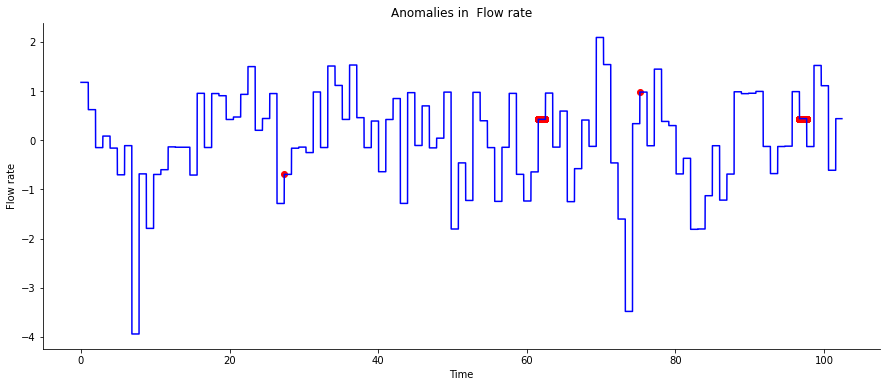

In [85]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

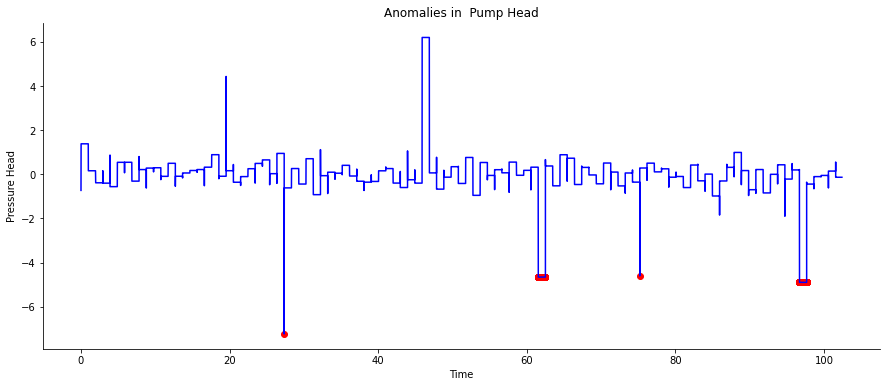

In [86]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")

plt.show()

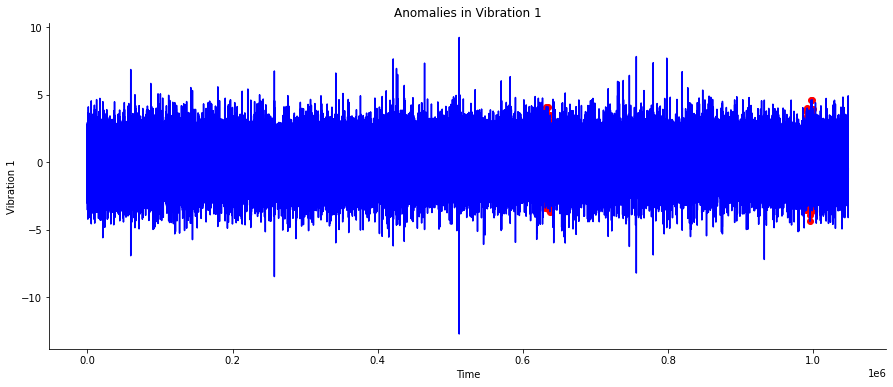

In [87]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 1'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

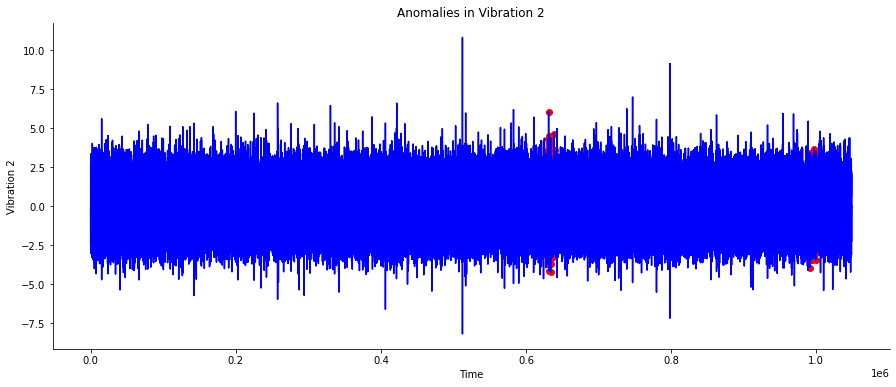

In [88]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 2'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

In [89]:
model.save("LSTM02_Vib")


INFO:tensorflow:Assets written to: LSTM02_Vib\assets


INFO:tensorflow:Assets written to: LSTM02_Vib\assets
